In [332]:
import numpy
print(numpy.__version__)

1.14.6


In [333]:
import pandas
print(pandas.__version__)

0.22.0


In [334]:
import matplotlib
print(matplotlib.__version__)

2.1.2


In [344]:
import seaborn
print(seaborn.__version__)

0.7.1


In [335]:
import wordcloud
print(wordcloud.__version__)

1.5.0


In [336]:
import tensorflow
print(tensorflow.__version__)

1.12.0


In [1]:
import tensorflow as tf
from tensorflow.python.client import device_lib

# 查看当前机器的GPU是否可用
if tf.test.is_gpu_available():
  # 查看GPU设备名字
  gpu_device_name = tf.test.gpu_device_name()
  print("gpu_device_name={}.".format(gpu_device_name))
  
  # 列出所有的本地机器GPU/CPU设备
  local_device_protos = device_lib.list_local_devices()

  # 只打印GPU设备
  [print(x.physical_device_desc) for x in local_device_protos if x.device_type == 'GPU' if x.physical_device_desc is not None]

gpu_device_name=/device:GPU:0.
device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7


In [0]:
# 从辛普森剧本里将第18个片段（Episode）取出来作为教程

import pandas as pd

# 读取辛普森剧本所有的文本
df = pd.read_csv("simpsons_script_lines.csv", error_bad_lines=False)
# 取出所有的剧本片段id和正文
df_1 = df[["episode_id", "raw_text"]]
# 我们就拿第18个片段作为教程
df_2 = df_1.query("episode_id == 18")
# 取出第18个片段的所有对话
raw_text = df_2["raw_text"]

# 遍历第18个片段的所有对话
my_list = []
for i, t in enumerate(raw_text):
    # 前5行数据不要
    if i < 5:
        continue
    # 分号分割，第一个是说话者，第二个是对话文本
    t_a = t.split(":")
    # 替换说话者的名字中的空格为下划线，并首尾去掉引号
    a = t_a[0].strip("\"").replace(" ", "_") + ":" + t_a[1].strip("\"")
    # 一个新的场景前使用两个换行分割
    if a.startswith("(") and i > 5:
        a = "\n\n" + a
    my_list.append(a)

# 写入文件
with open('Simpsons_Episode_18.txt', 'w') as f:
    for item in my_list:
        f.write("{}\n".format(item))

In [0]:
import os

def load_data(filepath):
    """
    加载文件
    """
    input_file = os.path.join(filepath)
    with open(input_file, "r") as f:
        data = f.read()
    return data
  
# 加载数据 Simpsons Episode 18 剧本文本文件
data_filepath = 'Simpsons_Episode_18.txt'
text = load_data(data_filepath)

In [8]:
import numpy as np

print('数据集基本统计')
print('粗略统计单词的数量：{}。'.format(len({word: None for word in text.split()})))

print("\r")
scenes = text.split('\n\n')
print('有{}个场景。'.format(len(scenes)))
sentence_count_scene = [scene.count('\n') for scene in scenes]
print('每个场景平均句子数量：{}。'.format(np.average(sentence_count_scene)))

print("\r")
sentences = [sentence for scene in scenes for sentence in scene.split('\n')]
print('总计{}行。'.format(len(sentences)))
word_count_sentence = [len(sentence.split()) for sentence in sentences]
print('每一行单词的平均数量：{}。'.format(np.average(word_count_sentence)))

print("\r")
print("前5行句子：")
print('\n'.join(text.split('\n')[:5]))

数据集基本统计
粗略统计单词的数量：1444。

有27个场景。
每个场景平均句子数量：9.88888888888889。

总计294行。
每一行单词的平均数量：10.785714285714286。

前5行句子：
(Moe's_Tavern: int. Moe's tavern - night)
Barney_Gumble: So, Homer. What happened in Capitol City?
Homer_Simpson: Aw, Barney.
Moe_Szyslak: Come on, Homer. We're dyin' of curiosity.
Homer_Simpson: Look, there's only one thing worse than being a loser. It's being one of those guys who sits in a bar telling the story of how he became a loser. And I never want that to happen to me.


In [0]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def draw_wordcloud_image(bodytext=None, 
                         filepath=None, 
                         background_color="white", 
                         min_font_size=5,
                         max_font_size=100, 
                         width=700, 
                         height=500,
                         colormap="Blues"
                         ):
    """
    绘制词云图
    参数bodytext：文本
    参数filepath：文本文件路径
    参数background_color：绘制的背景颜色
    参数min_font_size：最小字体
    参数max_font_size：最大字体
    参数width：宽度
    参数height：高度
    参数colormap：颜色表，从单词中随机选择绘制颜色
    """
    data_text = bodytext
    if filepath is not None:
        # 读取文本文件
        with open(filepath) as f:
            data_text = f.read()
            
    if len(data_text) > 0:
        # 生成词云图片WordCloud对象
        wordcloud = WordCloud(background_color=background_color,
                                 min_font_size=min_font_size,
                                 max_font_size=max_font_size, 
                                         width=width, 
                                        height=height, 
                                      colormap=colormap).generate(data_text)
        # 绘制图像
        plt.figure()
        plt.imshow(wordcloud, interpolation='bilinear')
        # 绘图时的网格是否显示
        plt.grid()
        # 绘图时不显示X和Y轴的标尺
        # plt.axis("off") 
        # 显示绘图
        plt.show()
     

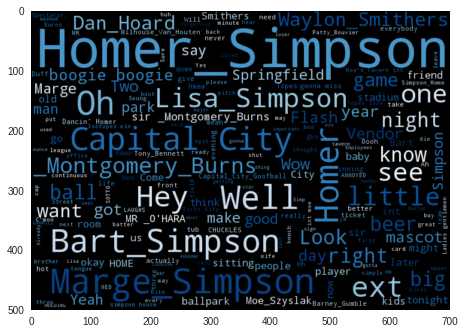

In [347]:
# 直接查看词云图
draw_wordcloud_image(filepath=data_filepath, background_color="black")

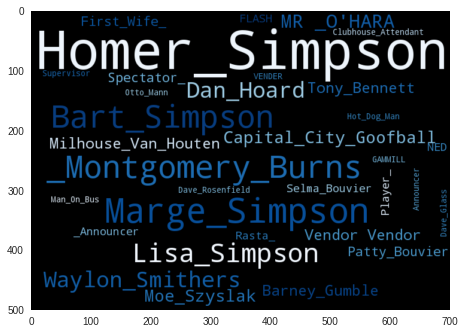

In [349]:
# 将剧本中所有的句子的说话者和说话的内容分开
speakers_list = []
bodytext_list = []
for i, line in enumerate(sentences):
    # 分号分割
    line_arr = line.split(":")
    # 分割时，如果长度有小于2的元素，就过滤掉
    if len(line_arr) == 2:
        # 第一个元素是说话者名字
        speaker_name = line_arr[0]
        # 第二个元素是说话的内容
        bodytext = line_arr[1]
        if len(speaker_name) > 0 and not speaker_name.startswith("("):
            speakers_list.append(speaker_name)
        if len(bodytext) > 0 and not bodytext.endswith(")"):
            bodytext_list.append(bodytext)
    
# 查看所有说话者的词云图
speakers_list_str = " ".join(speakers_list)
draw_wordcloud_image(bodytext=speakers_list_str, background_color="black")

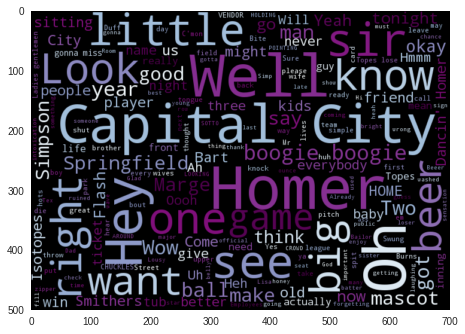

In [350]:
# 查看所有说话者说的内容的词云图
bodytext_list_str = " ".join(bodytext_list)
draw_wordcloud_image(bodytext=bodytext_list_str, background_color="black", colormap="BuPu")

In [351]:
from collections import Counter

# 通过Counter来统计每个说话者的重复次数
speaker_counter = Counter(speakers_list)
# 打印最常见的单词，简单说，就是从大到小排序，默认是全部的
speakers_name_most_common = speaker_counter.most_common()
speakers_name_most_common

[('Homer_Simpson', 84),
 ('Marge_Simpson', 23),
 ('Bart_Simpson', 19),
 ('C._Montgomery_Burns', 19),
 ('Lisa_Simpson', 13),
 ('Waylon_Smithers', 9),
 ('Dan_Hoard', 9),
 ("MR._O'HARA", 6),
 ('Moe_Szyslak', 5),
 ('Vendor', 5),
 ('Capital_City_Goofball', 5),
 ('Barney_Gumble', 4),
 ('Milhouse_Van_Houten', 4),
 ('Tony_Bennett', 4),
 ('Patty_Bouvier', 3),
 ('FLASH', 2),
 ('P.A._Announcer', 2),
 ('NED', 2),
 ('Selma_Bouvier', 2),
 ('First_Wife_#3', 2),
 ('Otto_Mann', 1),
 ('Man_On_Bus', 1),
 ('GAMMILL', 1),
 ('Player_#1', 1),
 ('VENDER', 1),
 ('Player_#2', 1),
 ('Rasta_#1', 1),
 ('Rasta_#2', 1),
 ('Supervisor', 1),
 ('Dave_Glass', 1),
 ('First_Wife_#1', 1),
 ('Hot_Dog_Man', 1),
 ('Announcer', 1),
 ('Spectator_#1', 1),
 ('Spectator_#2', 1),
 ('Spectator_#3', 1),
 ('Clubhouse_Attendant', 1),
 ('Dave_Rosenfield', 1)]

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


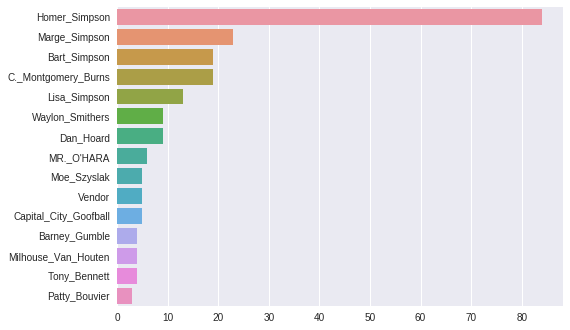

In [354]:
# 取前15个元素
speaker_X = [name[0] for name in speakers_name_most_common][:15]
speaker_y = [name[1] for name in speakers_name_most_common][:15]

import seaborn as sns
# 绘制直方图显示
# 参数orient：h表示水平（horizontal），v表示垂直（vertical）
sns.barplot(x=speaker_y, y=speaker_X, orient='h')

In [0]:
# 预处理函数
import numpy as np
from collections import Counter

def create_lookup_tables(text):
    """
    创建一个检查表，包含两个字典对象，单词和索引的映射
    """
    # Counter对象是一个便利的快速的计数器
    word_counts = Counter(text)
    # 每个id对应着一个单词
    int_to_vocab = {counts: word for counts, word in enumerate(word_counts)}
    # 每个单词对应着一个id
    vocab_to_int = {word: counts for counts, word in int_to_vocab.items()}
    return vocab_to_int, int_to_vocab

In [0]:
# 为什么要令牌化标点符号了？
# 比如：问号，感叹号等对于神经网络来说，非常难以训练，也就很难区分 thanks! 和 thanks

def token_lookup():
    """
    生成一个字典，将标点符号映射成token
    令牌化（Tokenization）字典，key是标点符号，value是token
    """
    token_dict = { "." : "||Period||", 
                       "," : "||Comma||",
                       "\"" : "||Quotation_Mark||",
                       ";" : "||Semicolon||",
                       "!" : "||Exclamation_Mark||",
                       "?" : "||QuestionMark||",
                       "(" : "||Left_Parentheses||",
                       ")" : "||Right_Parentheses||",
                       "--" : "||Dash||",
                       "\n" : "||Return||" }
    return token_dict


In [0]:
import pickle

def save_preprocessed_data(int_text, vocab_to_int, int_to_vocab, token_dict):
    """
    保存预处理数据
    """
    pickle.dump((int_text, vocab_to_int, int_to_vocab, token_dict), open('preprocessed_data.p', 'wb'))
    
    
def load_preprocessed_data():
    """
    加载预处理数据
    """
    return pickle.load(open('preprocessed_data.p', mode='rb'))

  
def preprocess_scripts_data(text):
    """
    预处理剧本文本数据
    """
    # 将剧本文本里的标点符号都转换成token
    token_dict = token_lookup()
    for key, token in token_dict.items():
        text = text.replace(key, ' {} '.format(token))
    # 全部转换成小写
    text = text.lower()
    # 全部分割，默认分隔符是空格
    text = text.split()
    # 将剧本文本数据转换成检查表
    vocab_to_int, int_to_vocab = create_lookup_tables(text)
    # 将单词对应的id取出
    int_text = [vocab_to_int[word] for word in text]
    # 保存预处理数据到机器上
    save_preprocessed_data(int_text, vocab_to_int, int_to_vocab, token_dict)
    # 以元组返回
    return int_text, vocab_to_int, int_to_vocab, token_dict
  
int_text, vocab_to_int, int_to_vocab, token_dict = preprocess_scripts_data(text)

In [0]:
import tensorflow as tf

def get_inputs():
    """
    创建TensorFlow模型的input，targets和learning rate的占位符的函数
    """
    # tf.placeholder(dtype, shape=None, name=None)
    # 参数说明：
    # dtype，在张量中的元素的数据类型
    # shape，张量的大小，如果不指定大小，就是任意大小
    # name，操作的名称
    input = tf.placeholder(tf.int32, [None, None], name="input")
    targets = tf.placeholder(tf.int32, [None, None], name="targets")
    learning_rate = tf.placeholder(tf.float32, name="learning_rate")
    return (input, targets, learning_rate)

In [0]:
def get_init_cell(batch_size, rnn_size, n_layers=1):
    """
    构建RNN Cell并初始化它，堆砌一个或者多个RNN Cell
    """
    # 创建BasicLSTMCell
    def make_lstm(rnn_size):
        return tf.contrib.rnn.BasicLSTMCell(rnn_size)
    
    # 根据n_layers来创建多个RNN Cell
    cell = tf.contrib.rnn.MultiRNNCell([make_lstm(rnn_size) for _ in range(n_layers)])
    # 使用zero来初始化RNN Cell的状态
    initial_state = cell.zero_state(batch_size, tf.float32)
    # 返回一个和输入的大小一样的张量
    initial_state = tf.identity(input=initial_state, name="initial_state")
    return cell, initial_state

In [0]:
def get_embed(input_data, vocab_size, embed_dim):
    """
    对input_data创建embedding，并返回
    """
    # 创建一个随机均匀分布的TensorFlow变量
    embedding = tf.Variable(tf.random_uniform((vocab_size, embed_dim), -1, 1))
    # 在嵌入张量列表中查找id，返回嵌入矩阵
    embed = tf.nn.embedding_lookup(embedding, input_data)
    return embed

In [0]:
def build_rnn(cell, inputs):
    """
    指定Cell来构建RNN
    """
    # 通过指定的Cell来构建RNN
    outputs, final_state = tf.nn.dynamic_rnn(cell, inputs, dtype=tf.float32)
    # 应用一个最终状态，名称为：final_state
    final_state = tf.identity(input=final_state, name="final_state")
    return outputs, final_state

In [0]:
def build_nn(cell, rnn_size, input_data, vocab_size, embed_dim):
    """
    通过以上定义的函数，我们来构建神经网络
    参数cell：RNN cell
    参数rnn_size：RNN的大小
    参数input_data：输入数据
    参数vocab_size：单词大小
    参数embed_dim：嵌入的维度的数量
    返回：返回一个Tuple类型的(Predictions, FinalState)
    """
    # 获取嵌入层
    embedded_layer = get_embed(input_data, vocab_size, embed_dim)
    # 构建RNN
    outputs, final_state = build_rnn(cell, embedded_layer)
    # 添加一个全连接层，输出层大小是vocab_size
    predictions = tf.contrib.layers.fully_connected(outputs, vocab_size, activation_fn=None)
    # 返回预测和最后状态
    return predictions, final_state

In [0]:
# Epochs的数量
num_epochs = 200
# 批次大小
batch_size = 128
# RNN大小
rnn_size = 256
# 嵌入维度大小
embed_dim = 500
# 序列长度
seq_length = 10
# 学习率
learning_rate = 0.01
# 每50个批次打印显示一次统计
show_every_n_batches = 50

In [0]:
from tensorflow.contrib import seq2seq

# 获取TensorFlow计算图
train_graph = tf.Graph()
with train_graph.as_default():
    vocab_size = len(int_to_vocab)
    # 获取输入文本、预测目标和学习率的占位符
    input_text, targets, lr = get_inputs()
    input_data_shape = tf.shape(input_text)
    # 初始化RNN Cell
    cell, initial_state = get_init_cell(input_data_shape[0], rnn_size)
    # 构建神经网络
    logits, final_state = build_nn(cell, rnn_size, input_text, vocab_size, embed_dim)
    # 生成单词的概率
    probs = tf.nn.softmax(logits, name='probs')
    # 计算损失值，就是sequence的加权交叉熵的损失值
    cost = seq2seq.sequence_loss(
        logits,
        targets,
        tf.ones([input_data_shape[0], input_data_shape[1]]))
    # 创建优化器
    optimizer = tf.train.AdamOptimizer(lr)
    # 梯度裁剪
    gradients = optimizer.compute_gradients(cost)
    capped_gradients = [(tf.clip_by_value(grad, -1., 1.), var) for grad, var in gradients if grad is not None]
    train_op = optimizer.apply_gradients(capped_gradients)

In [0]:
def get_batches(int_text, batch_size, seq_length):
    """
    获取所有批次
    参数int_text，所有单词的id列表
    参数batch_size，每个batch的大小
    参数seq_length，序列的长度
    """
    # 计算出需要多个批次
    n_batches = int(len(int_text) / (batch_size * seq_length))
    # 为了训练完整的批次，我们去掉最后面的几个字符
    # X的数据从0开始，y数据从1开始，这是因为，训练X，得出y
    xdata = np.array(int_text[:n_batches * batch_size * seq_length])
    ydata = np.array(int_text[1:n_batches * batch_size * seq_length + 1])
    # np.split()函数是将一个数组分割成多个子数组 
    x_batches = np.split(xdata.reshape(batch_size, -1), n_batches, 1)
    y_batches = np.split(ydata.reshape(batch_size, -1), n_batches, 1)
    # 最后将X和y组成元组呈NumPy数组返回
    return np.array(list(zip(x_batches, y_batches)))

In [366]:
# 获得所有的剧本文本数据的批次
batches = get_batches(int_text, batch_size, seq_length)
# 定义ckpt保存路径
load_ckpt_path = "./my_tvscripts_generator"
# 启动TensorFlow会话
with tf.Session(graph=train_graph) as sess:
    # 初始化TensorFlow会话的全局变量
    sess.run(tf.global_variables_initializer())
    # 遍历训练
    for epoch_i in range(num_epochs):
        # 初始化状态
        state = sess.run(initial_state, {input_text: batches[0][0]})
        # 所有的数据分批训练
        for batch_i, (x, y) in enumerate(batches):
            feed = {
                input_text: x,
                targets: y,
                initial_state: state,
                lr: learning_rate}
            # 训练模型
            train_loss, state, _ = sess.run([cost, final_state, train_op], feed)

            # 每50个batch训练，打印显示一次统计日志信息
            if (epoch_i * len(batches) + batch_i) % show_every_n_batches == 0:
                print('Epoch {:>3} Batch {:>4}/{}   train_loss = {:.3f}'.format(
                    epoch_i,
                    batch_i,
                    len(batches),
                    train_loss))
    # 保存模型
    saver = tf.train.Saver()
    saver.save(sess, load_ckpt_path)
    print('Model Trained and Saved')

Epoch   0 Batch    0/3   train_loss = 6.933
Epoch  16 Batch    2/3   train_loss = 0.239
Epoch  33 Batch    1/3   train_loss = 0.136
Epoch  50 Batch    0/3   train_loss = 0.145
Epoch  66 Batch    2/3   train_loss = 0.140
Epoch  83 Batch    1/3   train_loss = 0.127
Epoch 100 Batch    0/3   train_loss = 0.142
Epoch 116 Batch    2/3   train_loss = 0.137
Epoch 133 Batch    1/3   train_loss = 0.125
Epoch 150 Batch    0/3   train_loss = 0.141
Epoch 166 Batch    2/3   train_loss = 0.136
Epoch 183 Batch    1/3   train_loss = 0.125
Model Trained and Saved


In [0]:
# 恢复保存的预处理数据
int_text, vocab_to_int, int_to_vocab, token_dict = load_preprocessed_data()

In [0]:
def get_tensors(loaded_graph):
    """
    在TensorFlow计算图中，获取input，initial state，final state和probabilities张量
    参数loaded_graph：从文件中加载的TensorFlow的计算图 
    返回：(InputTensor, InitialStateTensor, FinalStateTensor, ProbsTensor)
    """
    InputTensor = loaded_graph.get_tensor_by_name("input:0")
    InitialStateTensor = loaded_graph.get_tensor_by_name("initial_state:0")
    FinalStateTensor = loaded_graph.get_tensor_by_name("final_state:0")
    ProbsTensor = loaded_graph.get_tensor_by_name("probs:0")
    return InputTensor, InitialStateTensor, FinalStateTensor, ProbsTensor
  
def pick_word(probabilities, int_to_vocab):
    """
    在生成的文本中，选择下一个单词
    参数probabilities：下一个单词的概率
    参数int_to_vocab：id对应着单词的元素的字典
    返回：预测单词的字符串
    """
    return int_to_vocab[np.argmax(probabilities)]

In [369]:
# 最大生成长度，我们定义200，读者也可以任意定义
gen_length = 200
# 三位说话者 homer simpson, moe szyslak, or Barney Gumble
# 我们从 moe_szyslak 开始
prime_word = 'moe_szyslak'

# 获取TensorFlow计算图
loaded_graph = tf.Graph()
with tf.Session(graph=loaded_graph) as sess:
    # 重新创建保存在MetaGraphDef中的图表。
    loader = tf.train.import_meta_graph(load_ckpt_path + '.meta')
    # 从文件中恢复模型
    loader.restore(sess, load_ckpt_path)
    # 通过加载的模型，获取神经网络的张量
    input_text, initial_state, final_state, probs = get_tensors(loaded_graph)

    # 生成序列设置
    gen_sentences = [prime_word + ':']
    # 计算初始状态
    prev_state = sess.run(initial_state, {input_text: np.array([[1]])})

    # 生成句子，句子的总长度为200
    for n in range(gen_length):
        # 动态输入
        dyn_input = [[vocab_to_int[word] for word in gen_sentences[-seq_length:]]]
        dyn_seq_length = len(dyn_input[0])

        # 获取预测
        probabilities, prev_state = sess.run(
            [probs, final_state],
            {input_text: dyn_input, initial_state: prev_state})
        # 从变量probabilities的维度中删除一个维度
        probabilities = np.squeeze(probabilities)
        # 选择预测的单词
        pred_word = pick_word(probabilities[dyn_seq_length-1], int_to_vocab)
        # 将单词添加起来
        gen_sentences.append(pred_word)
    
    # 将变量gen_sentences数组拼接成字符串
    tv_script = ' '.join(gen_sentences)
    # 遍历所有的token字典
    for key, token in token_dict.items():
        ending = ' ' if key in ['\n', '(', '"'] else ''
        # 将拼接的剧本字符串中的token替换成原本的标点符号
        tv_script = tv_script.replace(' ' + token.lower(), key)
    # 去掉字符串文本中的所有\n和(后面的空格
    tv_script = tv_script.replace('\n ', '\n')
    tv_script = tv_script.replace('( ', '(')
    # 输出打印生成的剧本
    print(tv_script)

INFO:tensorflow:Restoring parameters from ./my_tvscripts_generator
moe_szyslak:(moe's_tavern: int. moe's tavern - night)
barney_gumble:... some may, to capital city.
homer_simpson:(reverential) the duff brewery, homer!
bart_simpson: wow!
lisa_simpson: the pennyloafer!
homer_simpson: as i got up in front of this thing, if the players," expecting".
waylon_smithers:(sotto) the card needs needs, marge.
homer_simpson: you mean--?
homer_simpson:(sotto) oh, no.
homer_simpson: well, i'm ready to take"...


(ballpark: ext. ballpark - evening)
dan_hoard: bases loaded. 'topes have one out, too.
mr. _o'hara: excuse me, homer.


(ballpark: ext. ballpark - evening)
dan_hoard: bases loaded. 'topes have one out, too.
mr. _o'hara: excuse me, homer.


(ballpark: ext. ballpark - evening)
dan_hoard: bases loaded. 'topes have one out, too.
mr. _o'hara: excuse me, homer.


(


In [0]:
!pip install textgenrnn

# 使用开源工具包 textgenrnn

In [11]:
from textgenrnn import textgenrnn

textgen = textgenrnn()
# 从文件中训练模型
textgen.train_from_file('Simpsons_Episode_18.txt', num_epochs=30)
# 根据Temperature的值来生成剧本文本
textgen.generate()

Using TensorFlow backend.


318 texts collected.
Training on 19,917 character sequences.
Epoch 1/30
155/155 [==============================] - 8s 49ms/step - loss: 1.7872
####################
Temperature: 0.2
####################
(CAPITC) The Capital Capital Capital Capital City.

(CAPITS: Capital missimation - City - Capital Capital Capital City (CAPITT)

Homer_Simpson: Homer - Simpson: (CAPITT) The ball of the studios into the bigger of a big ball of the bigger.

####################
Temperature: 0.5
####################
Marge_Simpson: What to take a beer of the game. Smithers -- only sonystar.

Homer_Simpson: Tony - margett for the gif bell is officie, to tall someone walk on the way off of the sexual belly of here and one me, this witnal this IS Capital Capital Credition: Will be a his fee to the little birth of inniendar to the compary_Simpson: You made the smith of the Calicant Capita

Homer_Simpson: Homer of the Smithers.

####################
Temperature: 1.0
####################
Beir_Simpson: And. Tomn, 

In [0]:
# 生成10行文本
textgen.generate_to_file('my_generated_texts.txt', n=10)

In [13]:
# 查看文本
!cat my_generated_texts.txt

Marge_Simpson: Look! The Crosstown Bridge!
C._Montgomery_Burns: Oh, shut up.
Homer_Simpson: You know, boy, some of the players you see tonight may make it to the big leagues, one day.
Homer_Simpson: Oooh, red hots.

Marge_Simpson: (SOTTO) Oh, no. Marge, sir.
Homer_Simpson: (INTERRUPTING) Oh, oh, oh, the late gentlemen.
Homer_Simpson: I can't help but feel that if we had gotten to know each other better, my leaving would actually have meant something.
Homer_Simpson: Bart was seen the ball spit. but too complex.
Homer_Simpson: (REVERENTIAL) The Duff Brewery!
